In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# numericalization
from collections import Counter

# modeling
from sklearn.model_selection import train_test_split
# import torch
# from torch.utils.data import DataLoader, TensorDataset

pd.set_option('display.max_columns', 500)
title_fontsize = 15

In [57]:
tweets = pd.read_csv('./data/tweets_cleaned_tokenized_words.csv', 
                     parse_dates=['Date'], index_col=['Unnamed: 0'])
# tweets.drop(['Content'], axis=1, inplace = True)
stocks = pd.read_csv('./data/scraped_stock_2015_2022.csv', index_col=['Unnamed: 0'])

tweets.head()

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01 00:00:57,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"['lx21', 'made', '10008', 'aapl', 'check', 'ou..."
1,2015-01-01 00:01:36,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"['insanity', 'today', 'weirdo', 'massive', 'se..."
2,2015-01-01 00:01:50,sp100 stocks performance hd low sbux tgt dvn i...,AMZN,-0.4278,neutral,"['sp100', 'stock', 'performance', 'hd', 'low',..."
3,2015-01-01 00:06:47,gm tsla volkswagen pushes 2014 record recall t...,TSLA,0.0000,neutral,"['gm', 'tsla', 'volkswagen', 'push', '2014', '..."
4,2015-01-01 00:10:05,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."


In [63]:
tweets['Date'] = pd.to_datetime(tweets['Date'].dt.date)
tweets

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"['lx21', 'made', '10008', 'aapl', 'check', 'ou..."
1,2015-01-01,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"['insanity', 'today', 'weirdo', 'massive', 'se..."
2,2015-01-01,sp100 stocks performance hd low sbux tgt dvn i...,AMZN,-0.4278,neutral,"['sp100', 'stock', 'performance', 'hd', 'low',..."
3,2015-01-01,gm tsla volkswagen pushes 2014 record recall t...,TSLA,0.0000,neutral,"['gm', 'tsla', 'volkswagen', 'push', '2014', '..."
4,2015-01-01,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."
...,...,...,...,...,...,...
4099616,2015-01-17,rdpro9 pnppro9 zs guipos per conducted dialogu...,ZS,0.0000,neutral,"['rdpro9', 'pnppro9', 'z', 'guipos', 'per', 'c..."
4099617,2015-01-09,zspnppro9 zsppopcr zsppo conducted visitation ...,ZS,0.0000,neutral,"['zspnppro9', 'zsppopcr', 'zsppo', 'conducted'..."
4099618,2015-01-09,al zs zeynepsu,ZS,0.0000,neutral,"['al', 'z', 'zeynepsu']"
4099619,2015-01-06,opportunities front end developers zs zs assoc...,ZS,0.4389,positive,"['opportunity', 'front', 'end', 'developer', '..."


<AxesSubplot: xlabel='Date', ylabel='score'>

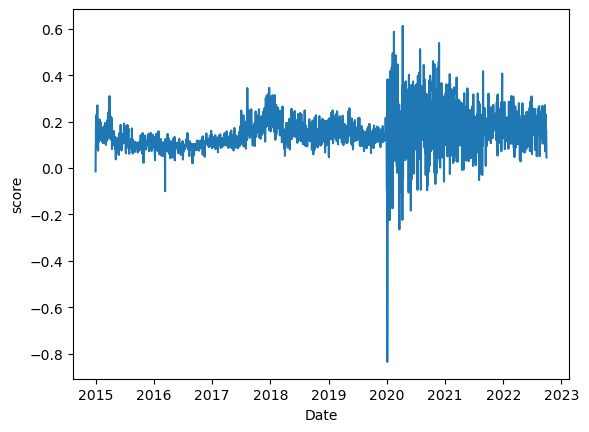

In [80]:
AAPL = tweets.groupby(['Date']).agg({'score': 'mean'}).reset_index()

sns.lineplot(x=AAPL['Date'], y=AAPL['score'])

In [116]:
tweets.head()

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"['lx21', 'made', '10008', 'aapl', 'check', 'ou..."
1,2015-01-01,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"['insanity', 'today', 'weirdo', 'massive', 'se..."
2,2015-01-01,sp100 stocks performance hd low sbux tgt dvn i...,AMZN,-0.4278,neutral,"['sp100', 'stock', 'performance', 'hd', 'low',..."
3,2015-01-01,gm tsla volkswagen pushes 2014 record recall t...,TSLA,0.0000,neutral,"['gm', 'tsla', 'volkswagen', 'push', '2014', '..."
4,2015-01-01,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."


In [118]:
tweets.groupby(['Date']).agg({'score': 'mean'}).reset_index()

,Date,score
0,2014-12-31,-0.014311
1,2015-01-01,0.087158
2,2015-01-02,0.106893
3,2015-01-03,0.228004
4,2015-01-04,0.226863
...,...,...
2823,2022-09-25,0.162191
2824,2022-09-26,0.151421
2825,2022-09-27,0.162993
2826,2022-09-28,0.107659


In [140]:
tweets.groupby('Date')['label'].apply(lambda x: x.value_counts().index[0]).value_counts()

neutral     2690
positive     135
negative       3
Name: label, dtype: int64

In [129]:
df = tweets[['Date', 'label']].groupby(['Date', 'label']).agg({'label': 'count'})

df.groupby('Date').max()

,label
Date,
2014-12-31,17
2015-01-01,423
2015-01-02,1082
2015-01-03,419
2015-01-04,508
...,...
2022-09-25,30
2022-09-26,59
2022-09-27,71


In [93]:
def sentiment():
    if

AAPL['score'].apply(lambda x: )

,Date,score
0,2014-12-31,-0.014311
1,2015-01-01,0.087158
2,2015-01-02,0.106893
3,2015-01-03,0.228004
4,2015-01-04,0.226863
...,...,...
2823,2022-09-25,0.162191
2824,2022-09-26,0.151421
2825,2022-09-27,0.162993
2826,2022-09-28,0.107659


In [91]:
round(-0.62)

-1

In [90]:
AAPL['score'].max()

0.6124499999999999

<AxesSubplot: xlabel='Date', ylabel='High'>

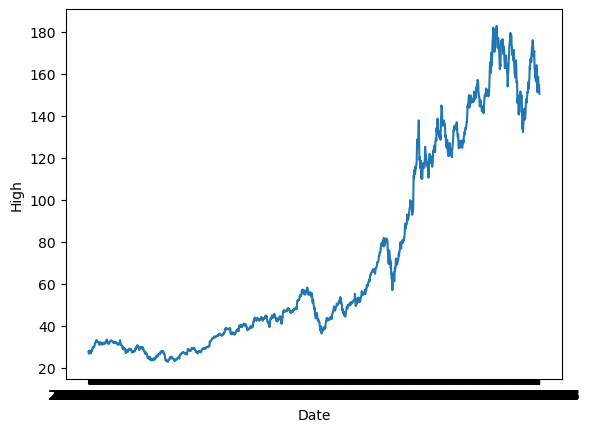

In [81]:
sns.lineplot(x=AAPL_stocks['Date'], y=AAPL_stocks['High'])

In [25]:
AAPL_tweets.iloc[:200,]['score'].mean()

0.156479

In [13]:
# separating dfs by tickers

for ticker in tweets['ticker'].unique():
    globals()[ticker+'_tweets'] = tweets[tweets['ticker'] == ticker]
    globals()[ticker+'_stocks'] = stocks[stocks['Stock Name'] == ticker]

In [14]:
# test

AAPL_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603210,212818400,AAPL
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910091,257142000,AAPL
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912342,263188400,AAPL
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247650,160423600,AAPL
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.179293,237458000,AAPL
...,...,...,...,...,...,...,...,...
1944,2022-09-22,152.380005,154.470001,150.910004,152.740005,152.487045,86652500,AAPL
1945,2022-09-23,151.190002,151.470001,148.559998,150.429993,150.180862,96029900,AAPL
1946,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.520309,93339400,AAPL
1947,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.508667,84442700,AAPL


<AxesSubplot: xlabel='Date', ylabel='High'>

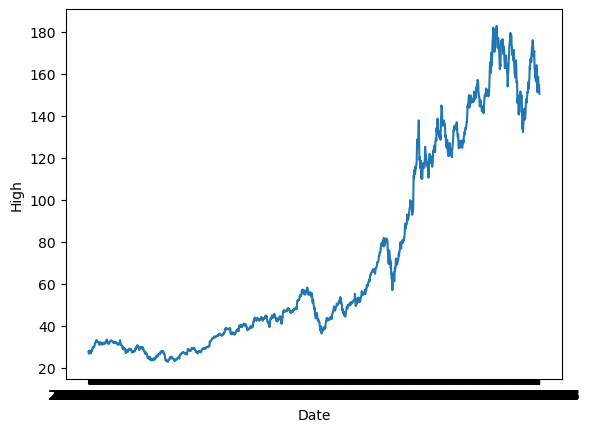

In [18]:
sns.lineplot(x=AAPL_stocks['Date'], y=AAPL_stocks['High'])

In [19]:
AAPL_tweets

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01 00:00:57,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"['lx21', 'made', '10008', 'aapl', 'check', 'ou..."
1,2015-01-01 00:01:36,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"['insanity', 'today', 'weirdo', 'massive', 'se..."
4,2015-01-01 00:10:05,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."
6,2015-01-01 00:10:16,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."
8,2015-01-01 00:10:17,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."
...,...,...,...,...,...,...
3960143,2020-01-09 12:14:55,richbrazil philiped cnbc aapl forced introduce...,AAPL,-0.4588,neutral,"['richbrazil', 'philiped', 'cnbc', 'aapl', 'fo..."
3960144,2020-01-02 14:37:42,apple going see 300 today aapl,AAPL,0.0000,neutral,"['apple', 'going', 'see', '300', 'today', 'aapl']"
3960145,2020-01-02 14:22:39,fjs79536796 peterschiff aapl china massive rec...,AAPL,0.0000,neutral,"['fjs79536796', 'peterschiff', 'aapl', 'china'..."
3960146,2020-01-02 14:11:18,anybody realize china could take us marketecon...,AAPL,-0.7003,negative,"['anybody', 'realize', 'china', 'could', 'take..."
